In [69]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize



In [50]:
train_imputed= pd.read_csv("train_oversampled_imputed.csv")

test_imputed= pd.read_csv("test_imputed.csv")


In [51]:
train_imputed

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.003235,0.28248,0.591250,3.09310,56.9340,0.000000,0.006650,2.54010,2.08750,0.71752,...,0.001677,0.004509,0.99682,0.000000,8.01570,6.1864,49.392,7.38980,16.53100,0
1,0.138540,0.59049,0.188250,2.72950,39.7490,0.000000,0.175000,0.69352,1.33530,0.40951,...,0.135000,0.338300,0.86895,1.176100,21.33600,28.8410,29.753,12.26800,1.89960,0
2,0.030908,0.56176,0.132070,1.29780,-12.1380,0.025807,0.039266,0.75046,1.06480,0.42158,...,0.060845,0.073315,0.93915,0.280560,10.89900,5.9638,83.020,4.39650,4.59370,0
3,-0.122580,0.58990,-0.244460,0.58373,-271.4400,-0.223030,-0.122580,0.69521,0.56201,0.41010,...,-0.118240,-0.298910,1.21520,0.000000,2.88350,5.6354,381.410,0.95697,0.85518,0
4,0.364080,0.28892,0.732720,4.19170,74.5810,0.164770,0.450600,2.46120,2.85430,0.71108,...,0.163920,0.512010,0.84217,0.000000,18.48700,14.6300,29.357,12.43300,75.68700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,-0.074926,0.31393,0.365790,2.16520,52.2910,-0.072755,-0.074926,2.18570,2.42920,0.68615,...,-0.030943,-0.109200,1.03080,0.000000,32.83975,5.1600,47.170,7.73800,7.58270,1
15008,0.054614,0.76089,-0.252420,0.64542,-24.3970,0.000000,0.067320,0.31409,4.19310,0.23899,...,0.015901,0.228520,0.98346,0.093904,204.32000,9.7419,61.967,5.89020,7.75910,1
15009,-0.044095,0.48842,0.099738,1.30030,1.4735,0.021569,-0.044095,1.04740,1.57880,0.51158,...,-0.002083,-0.086194,1.02790,0.305570,16.90400,4.6840,76.777,4.75400,2.77870,1
15010,0.000290,0.51641,0.322630,1.68220,-105.3400,0.000290,0.003596,0.91841,1.02290,0.47427,...,0.022385,0.000612,0.97761,0.091642,1.90460,9.0527,142.110,2.56850,5.94210,1


In [52]:
y_train_imputed = train_imputed.iloc[:,64]
x_train_imputed = train_imputed.drop('class', inplace=True, axis=1)
x_train_imputed = train_imputed.copy()

y_test_imputed = test_imputed.iloc[:,64]
x_test_imputed = test_imputed.drop('class', inplace=True, axis=1)
x_test_imputed = test_imputed.copy()


In [53]:
train_imputed

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.003235,0.28248,0.591250,3.09310,56.9340,0.000000,0.006650,2.54010,2.08750,0.71752,...,2918.60,0.001677,0.004509,0.99682,0.000000,8.01570,6.1864,49.392,7.38980,16.53100
1,0.138540,0.59049,0.188250,2.72950,39.7490,0.000000,0.175000,0.69352,1.33530,0.40951,...,1598.50,0.135000,0.338300,0.86895,1.176100,21.33600,28.8410,29.753,12.26800,1.89960
2,0.030908,0.56176,0.132070,1.29780,-12.1380,0.025807,0.039266,0.75046,1.06480,0.42158,...,1936.10,0.060845,0.073315,0.93915,0.280560,10.89900,5.9638,83.020,4.39650,4.59370
3,-0.122580,0.58990,-0.244460,0.58373,-271.4400,-0.223030,-0.122580,0.69521,0.56201,0.41010,...,-2523.20,-0.118240,-0.298910,1.21520,0.000000,2.88350,5.6354,381.410,0.95697,0.85518
4,0.364080,0.28892,0.732720,4.19170,74.5810,0.164770,0.450600,2.46120,2.85430,0.71108,...,2535.80,0.163920,0.512010,0.84217,0.000000,18.48700,14.6300,29.357,12.43300,75.68700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,-0.074926,0.31393,0.365790,2.16520,52.2910,-0.072755,-0.074926,2.18570,2.42920,0.68615,...,45.50,-0.030943,-0.109200,1.03080,0.000000,32.83975,5.1600,47.170,7.73800,7.58270
15008,0.054614,0.76089,-0.252420,0.64542,-24.3970,0.000000,0.067320,0.31409,4.19310,0.23899,...,-2086.00,0.015901,0.228520,0.98346,0.093904,204.32000,9.7419,61.967,5.89020,7.75910
15009,-0.044095,0.48842,0.099738,1.30030,1.4735,0.021569,-0.044095,1.04740,1.57880,0.51158,...,765.62,-0.002083,-0.086194,1.02790,0.305570,16.90400,4.6840,76.777,4.75400,2.77870
15010,0.000290,0.51641,0.322630,1.68220,-105.3400,0.000290,0.003596,0.91841,1.02290,0.47427,...,4345.10,0.022385,0.000612,0.97761,0.091642,1.90460,9.0527,142.110,2.56850,5.94210


In [54]:
train_imputed.describe()
x_test_imputed.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,2626.000000,2626.000000,2626.000000,2626.000000,2.626000e+03,2.626000e+03,2626.000000,2626.000000,2626.000000,2626.000000,...,2.626000e+03,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000
mean,0.048154,0.528513,0.184111,4.381265,-8.336369e+02,-3.967021e-02,0.061137,16.007281,1.748573,0.454546,...,6.093210e+03,0.041419,-0.357479,0.999420,4.115336,224.813769,14.667281,122.650050,8.818548,52.738475
std,0.222433,0.505946,0.445156,30.992906,4.190096e+04,1.138120e+00,0.230724,579.283618,2.013620,0.505176,...,6.205073e+04,0.956476,34.334833,5.980477,153.054504,4629.704090,99.646080,415.149782,20.021674,638.857982
min,-2.255800,0.000000,-9.056700,0.024246,-1.670200e+06,-4.301900e+01,-2.255800,-0.900560,0.000000,-9.056700,...,-7.513800e+05,-41.519000,-1667.300000,-198.690000,-136.290000,0.000000,-2.890697,0.000000,0.000000,-10.624955
25%,0.001053,0.251567,0.020252,1.054575,-5.224100e+01,6.938894e-18,0.002376,0.429228,1.009600,0.293605,...,2.346825e+01,0.005021,0.008733,0.876530,0.000000,5.783800,4.618575,39.784250,3.105400,2.035675
50%,0.041483,0.464415,0.197700,1.596350,2.216400e+00,6.938894e-18,0.049533,1.115100,1.186400,0.516015,...,8.684400e+02,0.051367,0.104725,0.953315,0.001451,10.730500,6.787250,68.849500,5.299450,4.146700
75%,0.124353,0.691063,0.420140,3.004975,5.601975e+01,8.321475e-02,0.142770,2.924950,2.035675,0.728563,...,4.208150e+03,0.127208,0.280810,0.996865,0.239490,25.602500,10.806500,117.615000,9.165575,10.071000
max,2.857200,10.057000,1.000000,991.190000,6.854400e+05,1.711300e+01,2.991300,29636.000000,63.482000,1.000000,...,2.653200e+06,1.820100,527.220000,167.400000,7617.300000,203500.000000,4470.400000,16701.000000,663.030000,21499.000000


In [55]:
for i in range(0,64):
        winsorize(x_train_imputed.iloc[:,0], limits=[0.1, 0.1])
        winsorize(x_test_imputed.iloc[:,0], limits=[0.1, 0.1])
        
x_train_imputed.describe()
x_test_imputed.describe()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,2626.000000,2626.000000,2626.000000,2626.000000,2.626000e+03,2.626000e+03,2626.000000,2626.000000,2626.000000,2626.000000,...,2.626000e+03,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000
mean,0.048154,0.528513,0.184111,4.381265,-8.336369e+02,-3.967021e-02,0.061137,16.007281,1.748573,0.454546,...,6.093210e+03,0.041419,-0.357479,0.999420,4.115336,224.813769,14.667281,122.650050,8.818548,52.738475
std,0.222433,0.505946,0.445156,30.992906,4.190096e+04,1.138120e+00,0.230724,579.283618,2.013620,0.505176,...,6.205073e+04,0.956476,34.334833,5.980477,153.054504,4629.704090,99.646080,415.149782,20.021674,638.857982
min,-2.255800,0.000000,-9.056700,0.024246,-1.670200e+06,-4.301900e+01,-2.255800,-0.900560,0.000000,-9.056700,...,-7.513800e+05,-41.519000,-1667.300000,-198.690000,-136.290000,0.000000,-2.890697,0.000000,0.000000,-10.624955
25%,0.001053,0.251567,0.020252,1.054575,-5.224100e+01,6.938894e-18,0.002376,0.429228,1.009600,0.293605,...,2.346825e+01,0.005021,0.008733,0.876530,0.000000,5.783800,4.618575,39.784250,3.105400,2.035675
50%,0.041483,0.464415,0.197700,1.596350,2.216400e+00,6.938894e-18,0.049533,1.115100,1.186400,0.516015,...,8.684400e+02,0.051367,0.104725,0.953315,0.001451,10.730500,6.787250,68.849500,5.299450,4.146700
75%,0.124353,0.691063,0.420140,3.004975,5.601975e+01,8.321475e-02,0.142770,2.924950,2.035675,0.728563,...,4.208150e+03,0.127208,0.280810,0.996865,0.239490,25.602500,10.806500,117.615000,9.165575,10.071000
max,2.857200,10.057000,1.000000,991.190000,6.854400e+05,1.711300e+01,2.991300,29636.000000,63.482000,1.000000,...,2.653200e+06,1.820100,527.220000,167.400000,7617.300000,203500.000000,4470.400000,16701.000000,663.030000,21499.000000


In [56]:
np.set_printoptions(precision = 3, suppress = True)
x_train_imputed.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,15012.000000,15012.000000,15012.000000,15012.000000,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,...,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,1.501200e+04,15012.000000,1.501200e+04,15012.000000,15012.000000
mean,0.021487,1.419752,-0.679871,8.060023,-8.309922e+02,-0.939169,0.032131,11.776724,1.815132,-0.435896,...,4.665558e+03,-0.609783,-0.329322,3.394209,0.527864,4.895631e+02,12.647701,7.731304e+02,9.215053,36.590943
std,1.060939,18.627734,18.613397,437.959511,9.750764e+04,20.298893,1.063030,549.008382,6.460866,18.626828,...,4.609641e+04,49.899162,9.894904,163.214538,10.309956,3.193001e+04,57.184667,2.608441e+04,52.693781,284.138869
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-6.699300e+05,-5691.700000,-267.450000,-1.328100,-172.070000,-1.136868e-13,-6.590300,-2.336500e+06,-0.000156,-0.000102
25%,-0.044219,0.328457,-0.056843,0.882030,-7.443700e+01,-0.040881,-0.043848,0.268140,0.979370,0.207520,...,-1.787225e+02,-0.016194,-0.041229,0.892400,0.000000,5.031975e+00,4.471150,4.751000e+01,2.509200,1.939500
50%,0.018266,0.556400,0.135560,1.323300,-1.462300e+01,0.000000,0.022908,0.753690,1.170200,0.415895,...,4.421200e+02,0.033845,0.073116,0.968420,0.000086,9.011900e+00,6.813650,8.417900e+01,4.307600,4.230850
75%,0.090336,0.778365,0.350590,2.351600,3.189175e+01,0.008062,0.110610,2.001700,2.100525,0.653053,...,2.712200e+03,0.110710,0.252570,1.015500,0.266717,2.081600e+01,11.047000,1.446225e+02,7.644425,10.022750
max,52.652000,480.730000,17.708000,53433.000000,6.837700e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,3.380500e+06,293.150000,552.640000,18118.000000,853.090000,3.660200e+06,4246.700000,1.073500e+06,1974.500000,17902.000000


In [57]:
counts = np.bincount(y_train_imputed)
counts


array([7506, 7506])

In [58]:
weight_0 = 1/ counts[0]
weight_1 = 1/counts[1]

In [59]:
mean = np.mean(x_train_imputed,axis=0)
std = np.std(x_train_imputed,axis=0)

In [60]:
x_train_imputed = (x_train_imputed - mean) / std
x_test_imputed = (x_test_imputed - mean) / std

In [61]:
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(x_train_imputed.shape[-1],)),
    keras.layers.Dense(64, activation=tf.nn.relu), keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation=tf.nn.relu), keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trai

In [62]:
metrics = [keras.metrics.FalseNegatives(name="fn"),
           keras.metrics.FalsePositives(name="fp"),
           keras.metrics.Precision(name="precision"),
           keras.metrics.Recall(name="recall"),
           keras.metrics.AUC(name="auc")]

In [63]:
model.compile(optimizer= keras.optimizers.Adam(1e-2),
              loss="binary_crossentropy", metrics= metrics)

In [64]:
class_weights = {0:weight_0,1:weight_1}

In [65]:
def learningcurve(history):
  # list all data in history
  print(history.history.keys())
  # summarize history for AUC
  plt.plot(history.history['auc'])
  plt.plot(history.history['val_auc'])
  plt.title('model auc')
  plt.ylabel('auc')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for precision
  plt.plot(history.history['precision'])
  plt.plot(history.history['val_precision'])
  plt.title('model precision')
  plt.ylabel('precision')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for recall
  plt.plot(history.history['recall'])
  plt.plot(history.history['val_recall'])
  plt.title('model recall')
  plt.ylabel('recall')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
    

Epoch 1/30


2022-12-03 10:08:20.436743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 - 1s - loss: 9.2697e-05 - fn: 3890.0000 - fp: 2691.0000 - precision: 0.5733 - recall: 0.4817 - auc: 0.5861 - val_loss: 0.6592 - val_fn: 56.0000 - val_fp: 733.0000 - val_precision: 0.0849 - val_recall: 0.5484 - val_auc: 0.6570 - 1s/epoch - 71ms/step
Epoch 2/30


2022-12-03 10:08:20.980915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 - 0s - loss: 8.7515e-05 - fn: 2998.0000 - fp: 2569.0000 - precision: 0.6370 - recall: 0.6006 - auc: 0.6721 - val_loss: 0.6095 - val_fn: 54.0000 - val_fp: 737.0000 - val_precision: 0.0867 - val_recall: 0.5645 - val_auc: 0.6809 - 177ms/epoch - 12ms/step
Epoch 3/30
15/15 - 0s - loss: 8.3262e-05 - fn: 2484.0000 - fp: 2605.0000 - precision: 0.6585 - recall: 0.6691 - auc: 0.7136 - val_loss: 0.6478 - val_fn: 30.0000 - val_fp: 1026.0000 - val_precision: 0.0839 - val_recall: 0.7581 - val_auc: 0.7119 - 167ms/epoch - 11ms/step
Epoch 4/30
15/15 - 0s - loss: 8.0062e-05 - fn: 1971.0000 - fp: 2783.0000 - precision: 0.6654 - recall: 0.7374 - auc: 0.7415 - val_loss: 0.5687 - val_fn: 38.0000 - val_fp: 812.0000 - val_precision: 0.0958 - val_recall: 0.6935 - val_auc: 0.7213 - 167ms/epoch - 11ms/step
Epoch 5/30
15/15 - 0s - loss: 7.6980e-05 - fn: 1849.0000 - fp: 2581.0000 - precision: 0.6867 - recall: 0.7537 - auc: 0.7626 - val_loss: 0.5704 - val_fn: 36.0000 - val_fp: 864.0000 - val_precision: 0.0924

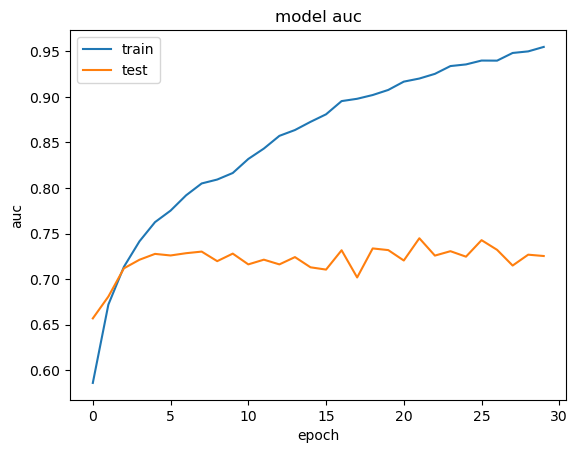

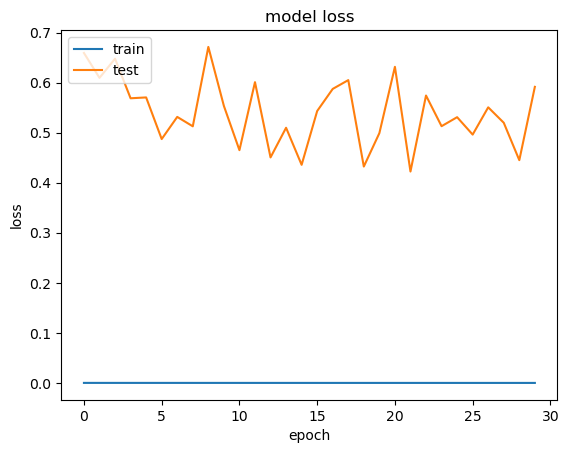

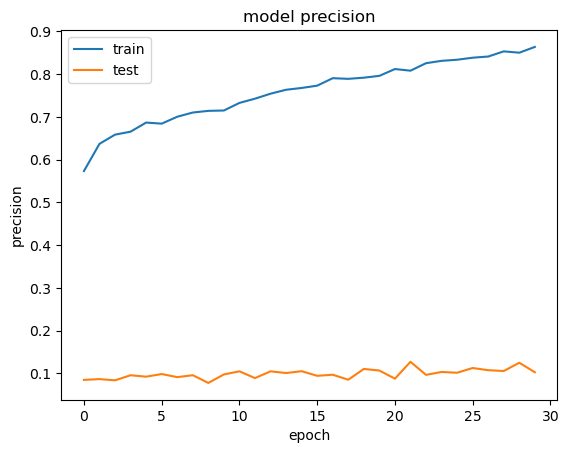

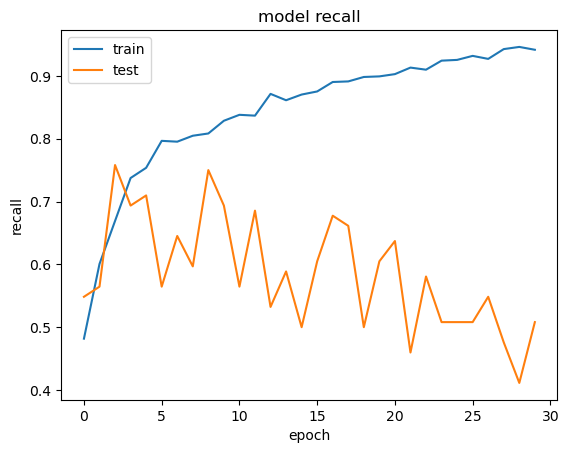

In [66]:
history = model.fit(x_train_imputed, y_train_imputed, batch_size = 1024,
                     epochs=30, verbose=2,
                     validation_data = (x_test_imputed, y_test_imputed),class_weight=class_weights)
learningcurve(history)

In [67]:
from keras.callbacks import TensorBoard
from tensorboard.plugins.pr_curve import summary as pr_summary

# Check complete example in:
# https://github.com/akionakamura/pr-tensorboard-keras-example
class PRTensorBoard(TensorBoard):
    def __init__(self, *args, **kwargs):
        # One extra argument to indicate whether or not to use the PR curve summary.
        self.pr_curve = kwargs.pop('pr_curve', True)
        super(PRTensorBoard, self).__init__(*args, **kwargs)

        global tf
        import tensorflow as tf

    def set_model(self, model):
        super(PRTensorBoard, self).set_model(model)

        if self.pr_curve:
            # Get the prediction and label tensor placeholders.
            predictions = self.model._feed_outputs[0]
            labels = tf.cast(self.model._feed_targets[0], tf.bool)
            # Create the PR summary OP.
            self.pr_summary = pr_summary.op(tag='pr_curve',
                                            predictions=predictions,
                                            labels=labels,
                                            display_name='Precision-Recall Curve')

    def on_epoch_end(self, epoch, logs=None):
        super(PRTensorBoard, self).on_epoch_end(epoch, logs)

        if self.pr_curve and self.validation_data:
            # Get the tensors again.
            tensors = self.model._feed_targets + self.model._feed_outputs
            # Predict the output.
            predictions = self.model.predict(self.validation_data[:-2])
            # Build the dictionary mapping the tensor to the data.
            val_data = [self.validation_data[-2], predictions]
            feed_dict = dict(zip(tensors, val_data))
            # Run and add summary.
            result = self.sess.run([self.pr_summary], feed_dict=feed_dict)
            self.writer.add_summary(result[0], epoch)
        self.writer.flush()